# 杭州萧山区项目
## 本地排放清单与MEIC比较
## `Compare local emis with MEIC`

---
*@author: Evan*\
*@date: 2023-07-21*

In [32]:
import xarray as xr
import numpy as np
import pandas as pd
import os

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../src/')
from namelist import *

In [33]:
lex = pd.read_excel(datadir + 'Local_emis_2020/preliminary_emis/count_emission.xlsx',sheet_name='LEX',index_col=0)
lex

,SO2,NOx,CO,PM10,PM25,VOCs,NH3,BC,OC
Sector,,,,,,,,,
Industry,444.05,1094.52,10195.22,1790.32,921.45,17531.03,103.64,0.97,1.02
Transportation,589.26,17335.72,16736.04,26497.62,7786.09,5169.00,283.82,327.60,96.14
Power,184.63,1029.31,1678.10,40.78,27.59,65.24,42.91,0.05,0.96
Residential,0.00,0.00,0.00,97.57,78.06,4937.04,782.17,1.01,35.09
Agriculture,1.83,7.59,137.54,1044.06,50.30,435.79,3268.19,2.40,9.71


# 绝对值

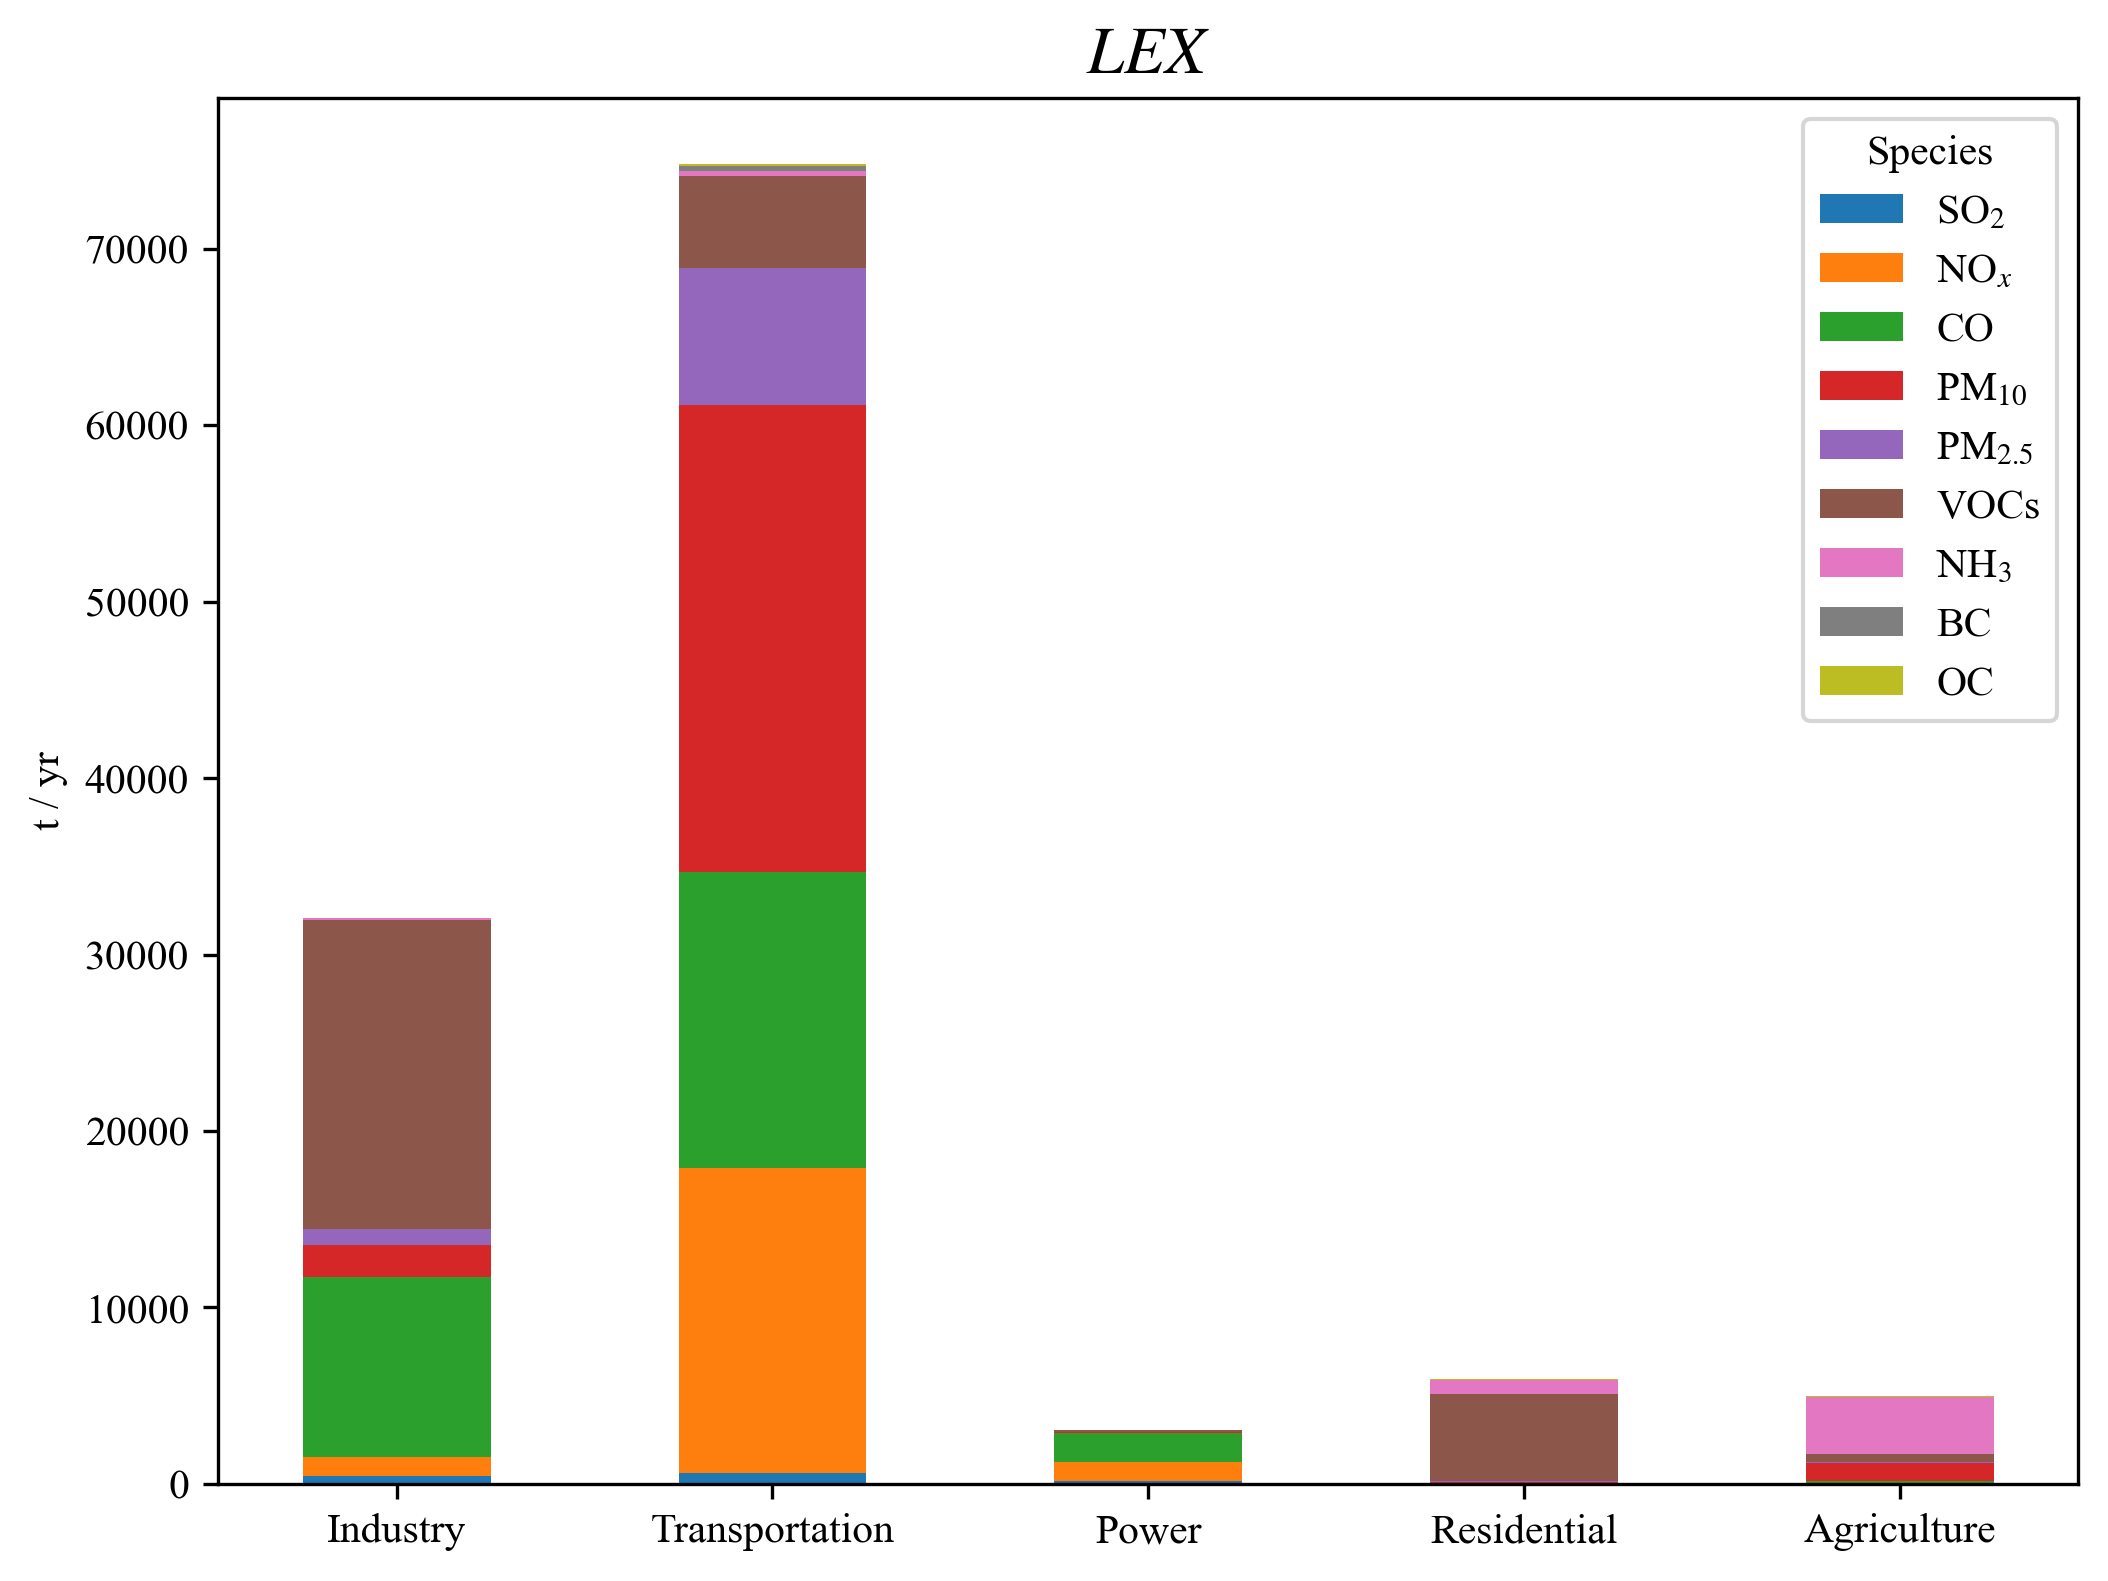

In [35]:
fig = plt.figure(figsize=(8,6),dpi=300)
ax = fig.subplots(1,1)

lex_copy = lex.copy()
bottom = [0] * len(lex.index) # None
labels = ['SO$_2$','NO$_x$','CO','PM$_{10}$','PM$_{2.5}$','VOCs','NH$_3$','BC','OC']

# 循环绘制每个污染物的柱状图
for i, col in enumerate(lex_copy.columns):
    if bottom is None:
        ax.bar(lex_copy.index, lex_copy[col], width=0.5, label=labels[i], align='center', alpha=1)
        bottom = lex_copy[col]
    else:
        ax.bar(lex_copy.index, lex_copy[col], width=0.5, bottom=bottom, label=labels[i], align='center', alpha=1)
        bottom += lex_copy[col]
ax.legend(title='Species')
ax.set_ylabel('t / yr')
ax.set_title('$LEX$',size=16,weight='bold')
plt.show()

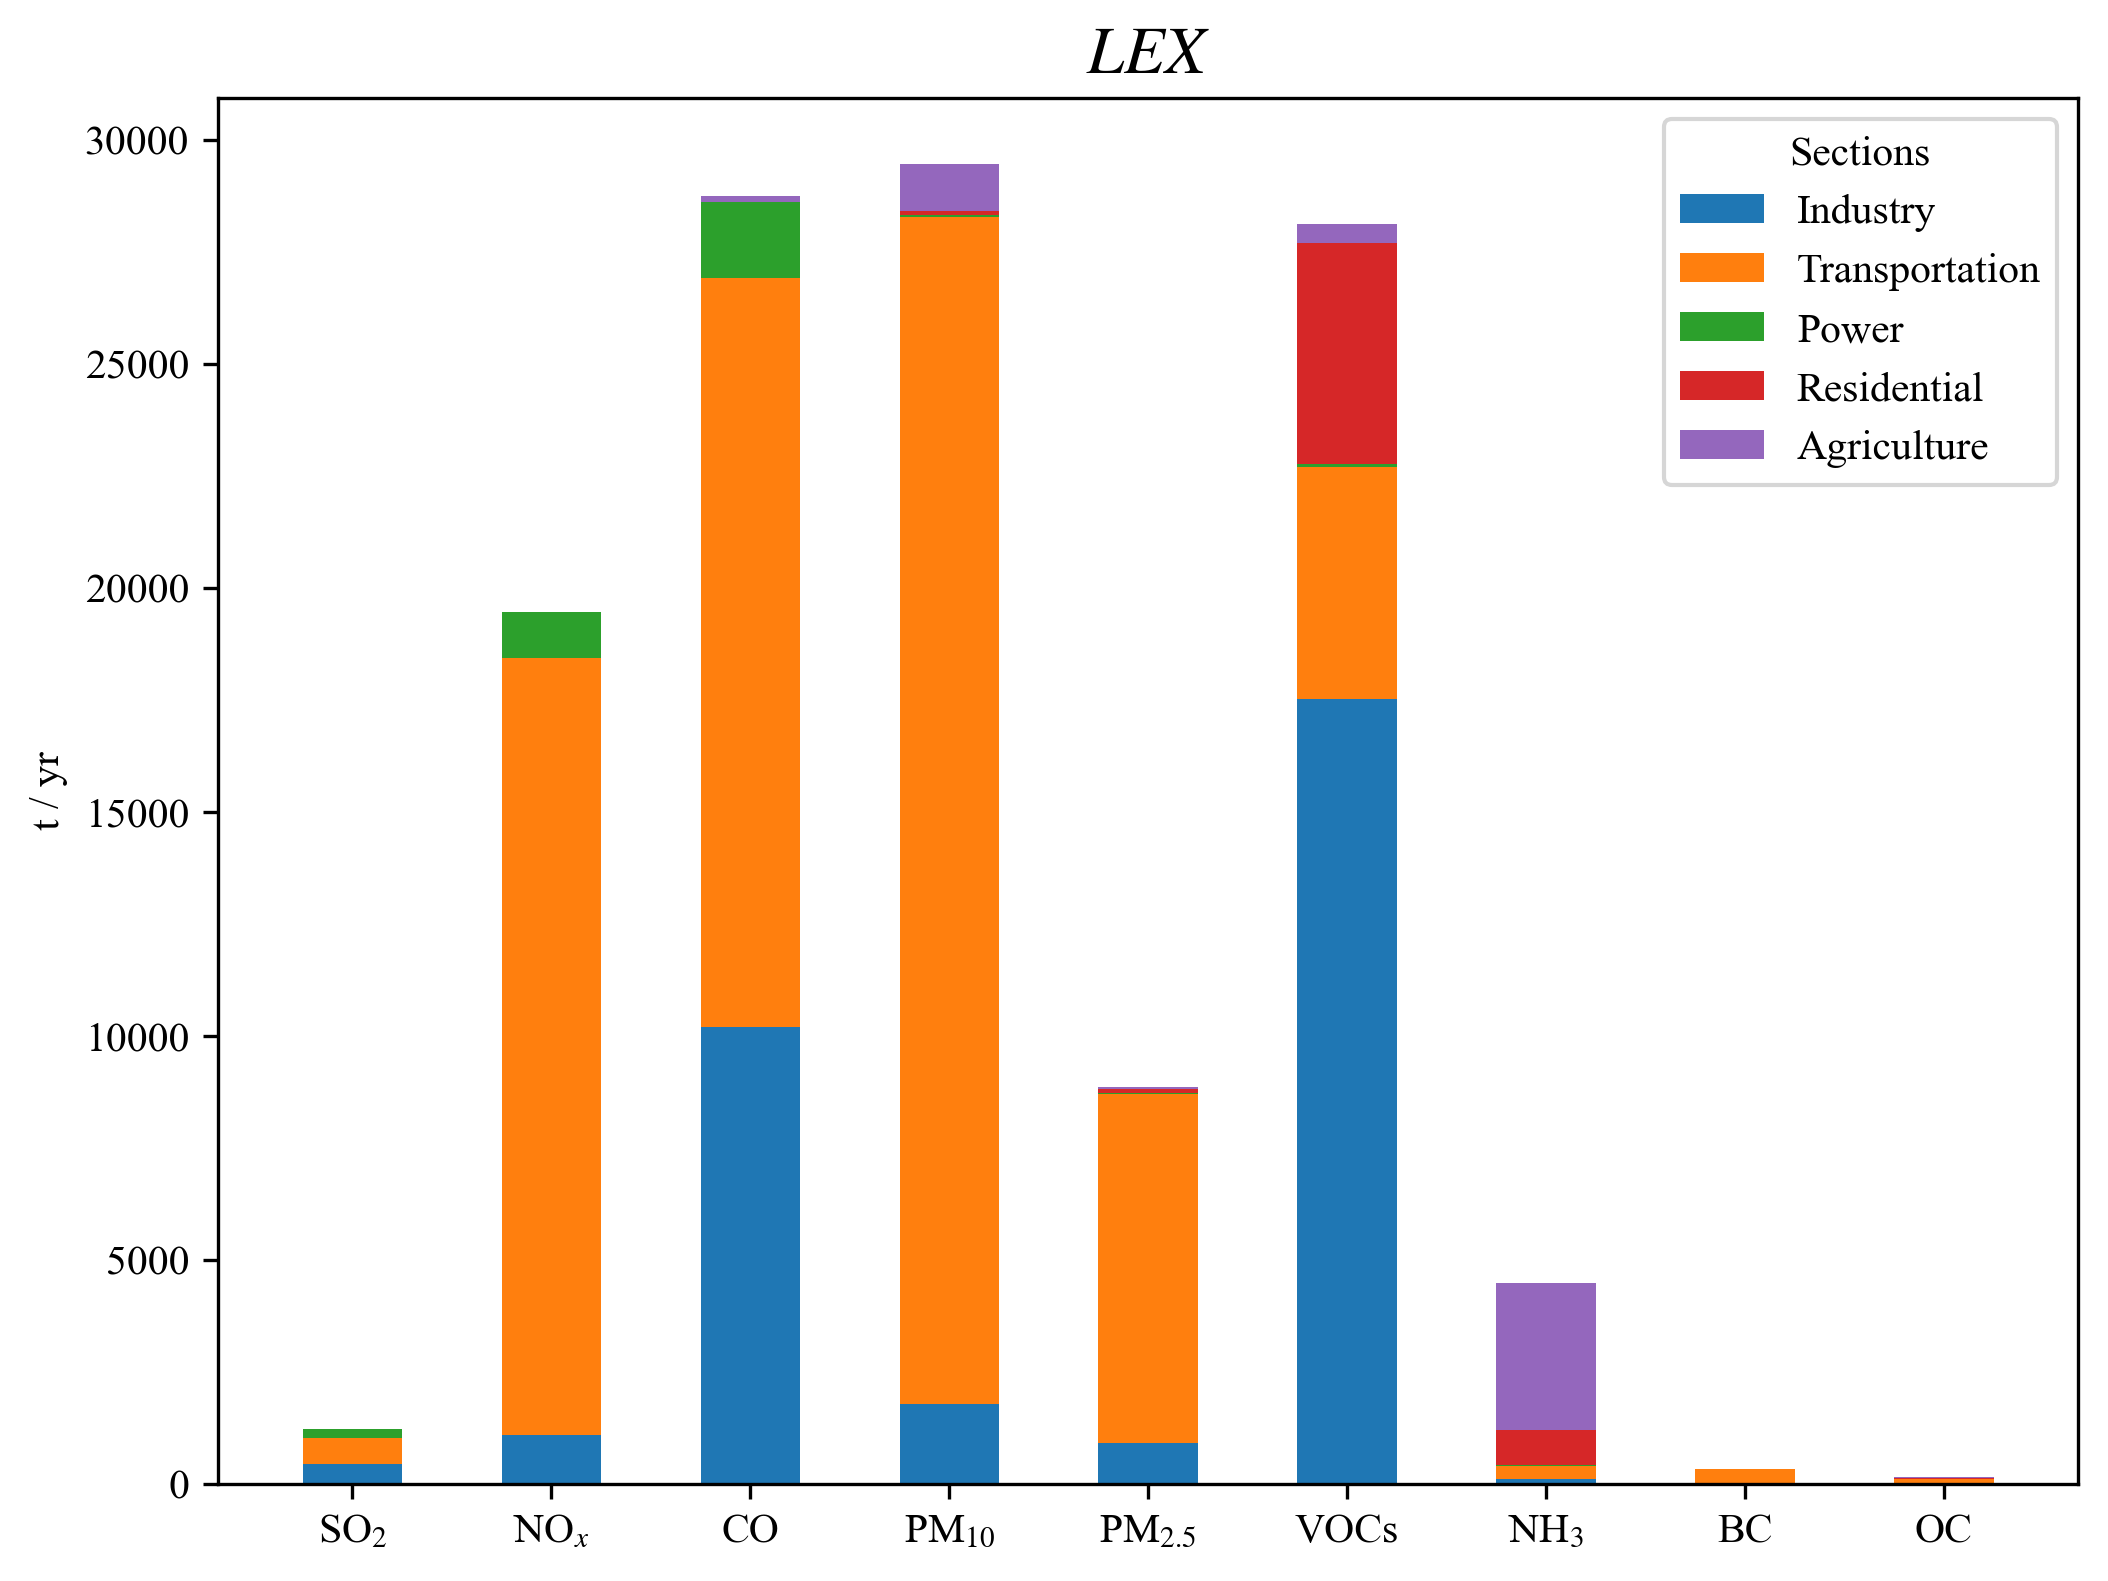

In [36]:
fig = plt.figure(figsize=(8,6),dpi=300)
ax = fig.subplots(1,1)

lexT = lex.T
lexT.index = ['SO$_2$','NO$_x$','CO','PM$_{10}$','PM$_{2.5}$','VOCs','NH$_3$','BC','OC']
lexT_copy = lexT.copy()
bottom = [0] * len(lexT.index) # None
labels = ['Industry', 'Transportation', 'Power', 'Residential', 'Agriculture']

# 循环绘制每个污染物的柱状图
for i, col in enumerate(lexT_copy.columns):
    if bottom is None:
        ax.bar(lexT_copy.index, lexT_copy[col], width=0.5, label=labels[i], align='center', alpha=1)
        bottom = lexT_copy[col]
    else:
        ax.bar(lexT_copy.index, lexT_copy[col], width=0.5, bottom=bottom, label=labels[i], align='center', alpha=1)
        bottom += lexT_copy[col]
ax.legend(title='Sections')
ax.set_ylabel('t / yr')
ax.set_title('$LEX$',size=16,weight='bold')
plt.show()

# 占比

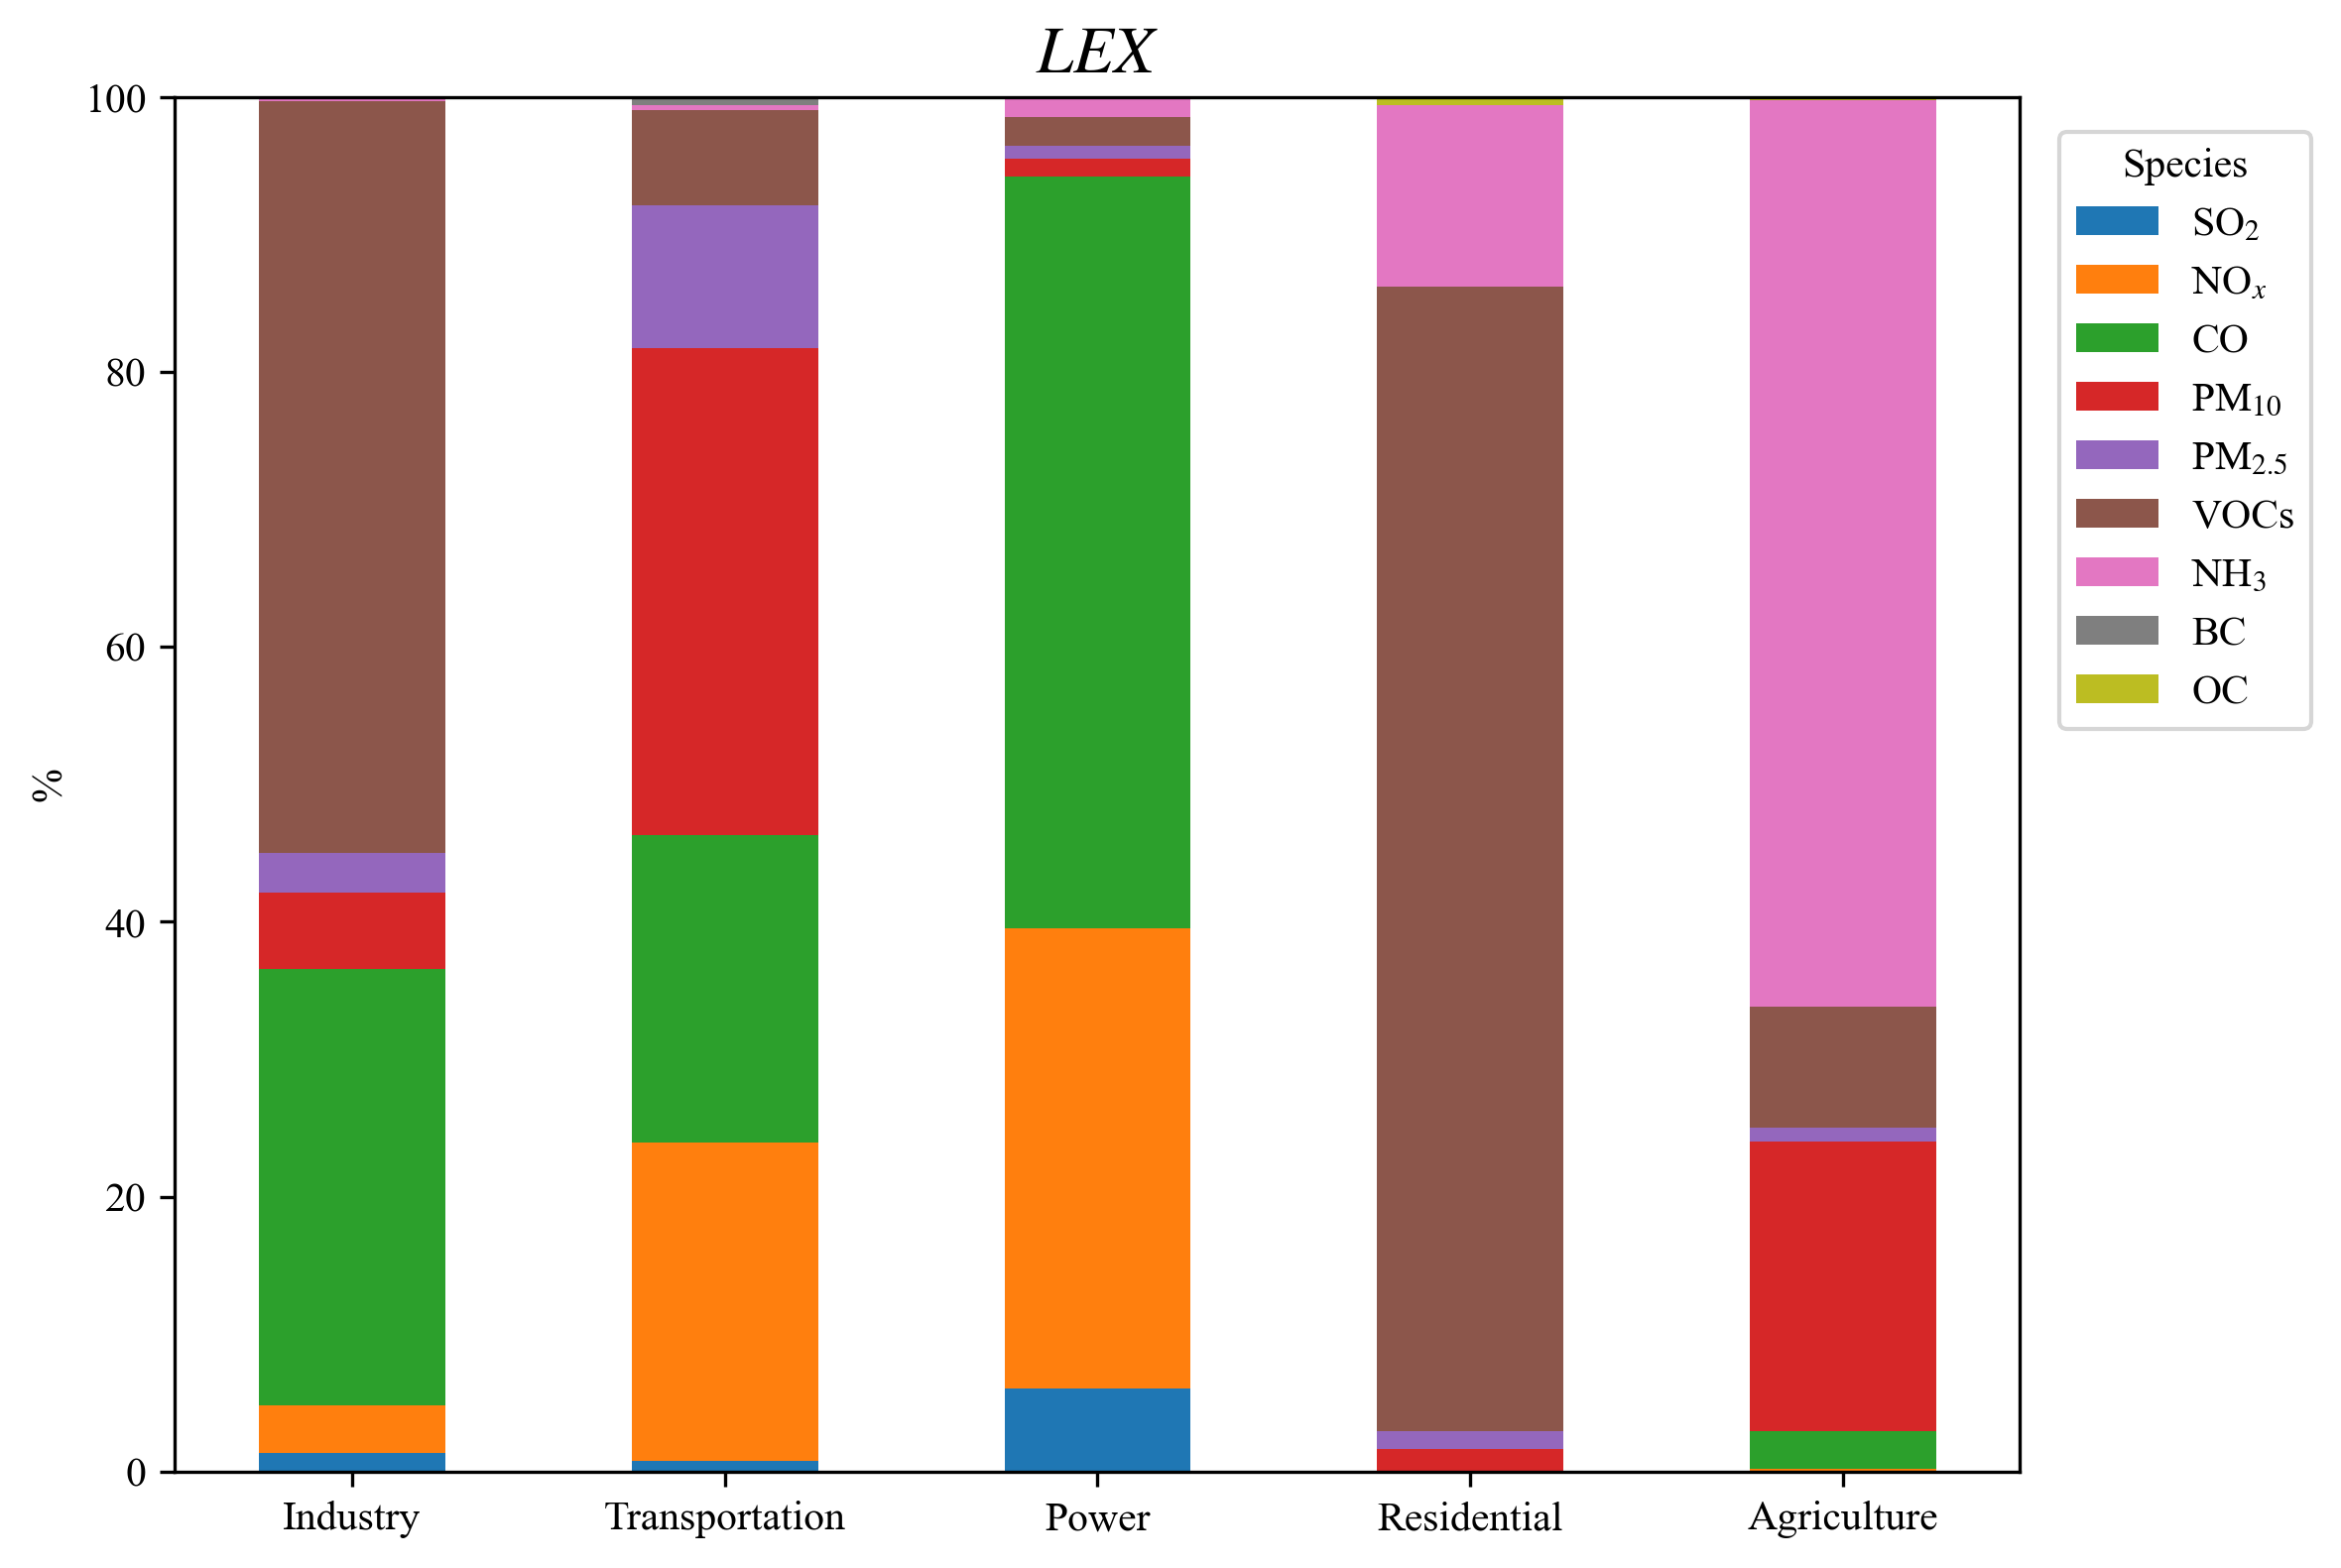

In [27]:
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.subplots(1, 1)

lex_copy = lex.copy()

# Calculate the total sum for each category
total_sum = lex_copy.sum(axis=1)

# Convert the values to percentage for each pollutant
for col in lex_copy.columns:
    lex_copy[col] = (lex_copy[col] / total_sum) * 100

bottom = [0] * len(lex.index)  # Initialize bottom

labels = ['SO$_2$', 'NO$_x$', 'CO', 'PM$_{10}$', 'PM$_{2.5}$', 'VOCs', 'NH$_3$', 'BC', 'OC']

# Loop through each pollutant and plot the stacked bar chart
for i, col in enumerate(lex_copy.columns):
    if bottom is None:
        ax.bar(lex_copy.index, lex_copy[col], width=0.5, label=labels[i], align='center', alpha=1)
        bottom = lex_copy[col]
    else:
        ax.bar(lex_copy.index, lex_copy[col], width=0.5, bottom=bottom, label=labels[i], align='center', alpha=1)
        bottom += lex_copy[col]

ax.legend(title='Species',bbox_to_anchor=(1.01,0.99))
ax.set_ylabel('%')
ax.set_title('$LEX$', size=16, weight='bold')
ax.set_ylim(0, 100)  # Set the y-axis range to 0-100 (%)
plt.show()


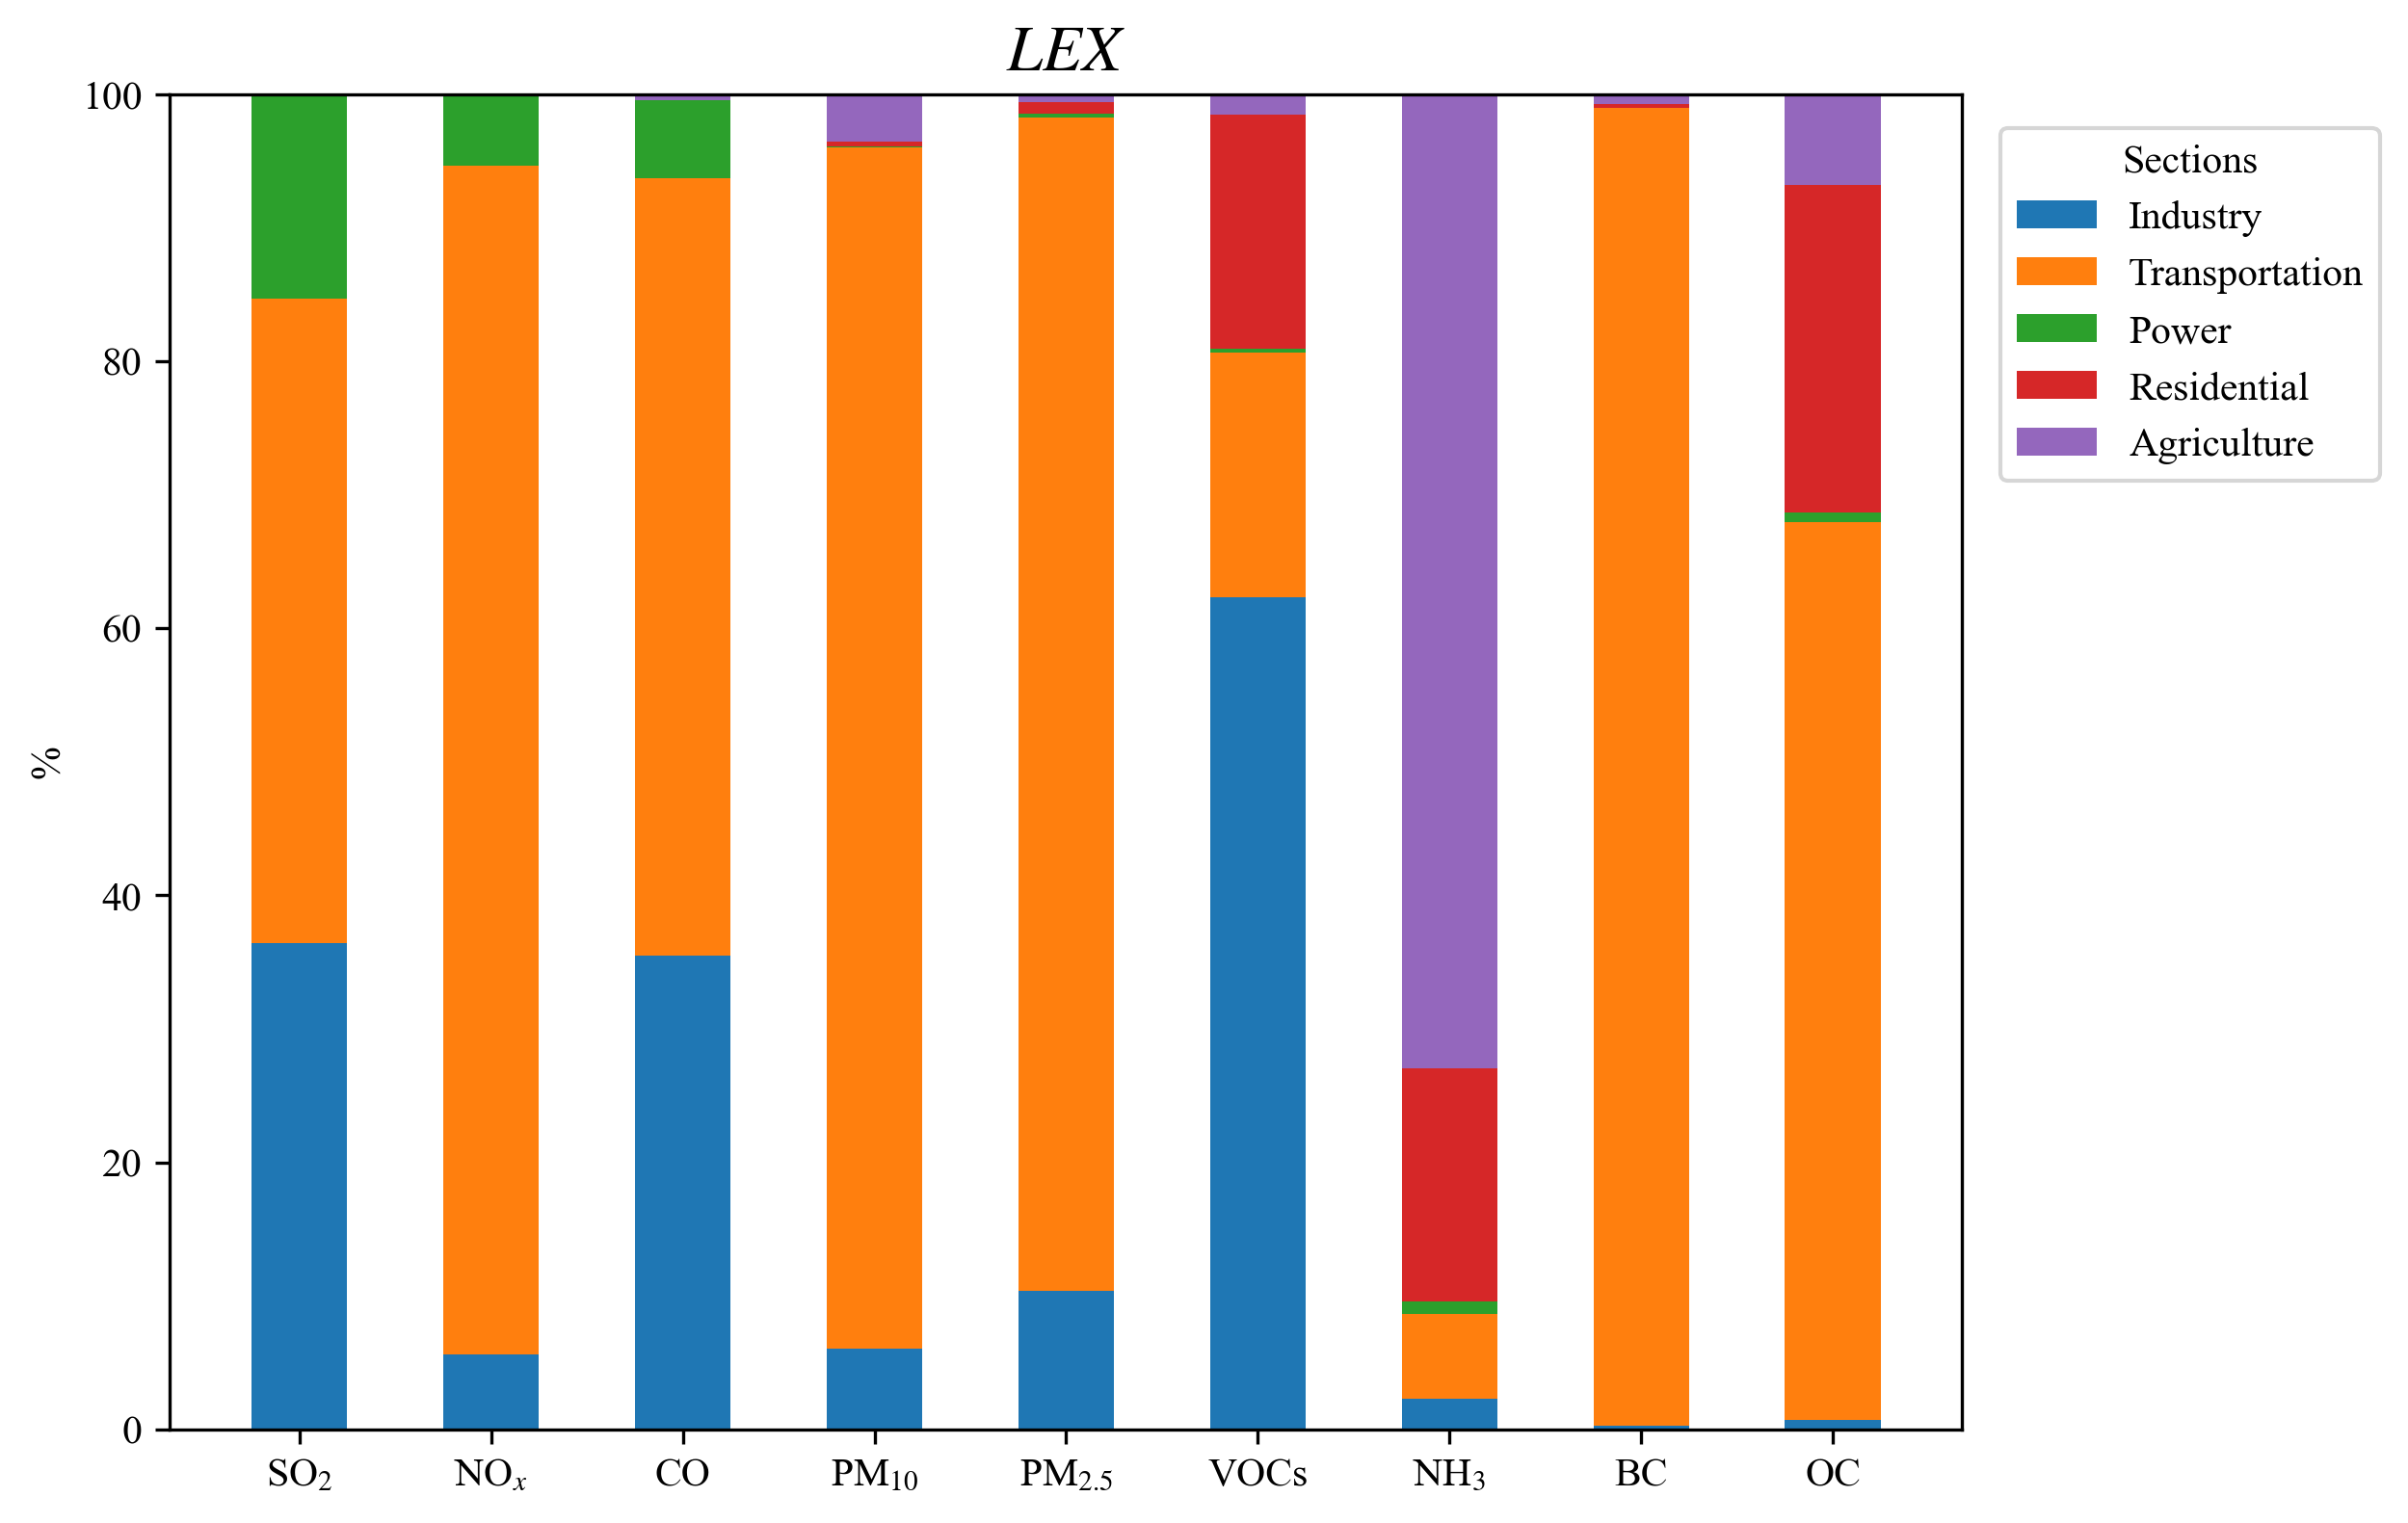

In [37]:
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.subplots(1, 1)

lexT = lex.T
lexT.index = ['SO$_2$','NO$_x$','CO','PM$_{10}$','PM$_{2.5}$','VOCs','NH$_3$','BC','OC']
lexT_copy = lexT.copy()

# Calculate the total sum for each category
total_sum = lexT_copy.sum(axis=1)

# Convert the values to percentage for each pollutant
for col in lexT_copy.columns:
    lexT_copy[col] = (lexT_copy[col] / total_sum) * 100

bottom = [0] * len(lexT.index)  # Initialize bottom

labels = ['Industry', 'Transportation', 'Power', 'Residential', 'Agriculture']

# Loop through each pollutant and plot the stacked bar chart
for i, col in enumerate(lexT_copy.columns):
    if bottom is None:
        ax.bar(lexT_copy.index, lexT_copy[col], width=0.5, label=labels[i], align='center', alpha=1)
        bottom = lexT_copy[col]
    else:
        ax.bar(lexT_copy.index, lexT_copy[col], width=0.5, bottom=bottom, label=labels[i], align='center', alpha=1)
        bottom += lexT_copy[col]

ax.legend(title='Sections',bbox_to_anchor=(1.01,0.99))
ax.set_ylabel('%')
ax.set_title('$LEX$', size=16, weight='bold')
ax.set_ylim(0, 100)  # Set the y-axis range to 0-100 (%)
plt.show()
